#Verify Environment

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common Imports

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('seaborn')

In [4]:
import seaborn as sns
sns.set()

In [5]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_colwidth', 199) 

#Check Data

In [6]:
diabetes_data = pd.read_csv("./diabetes.csv")

In [7]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes_data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


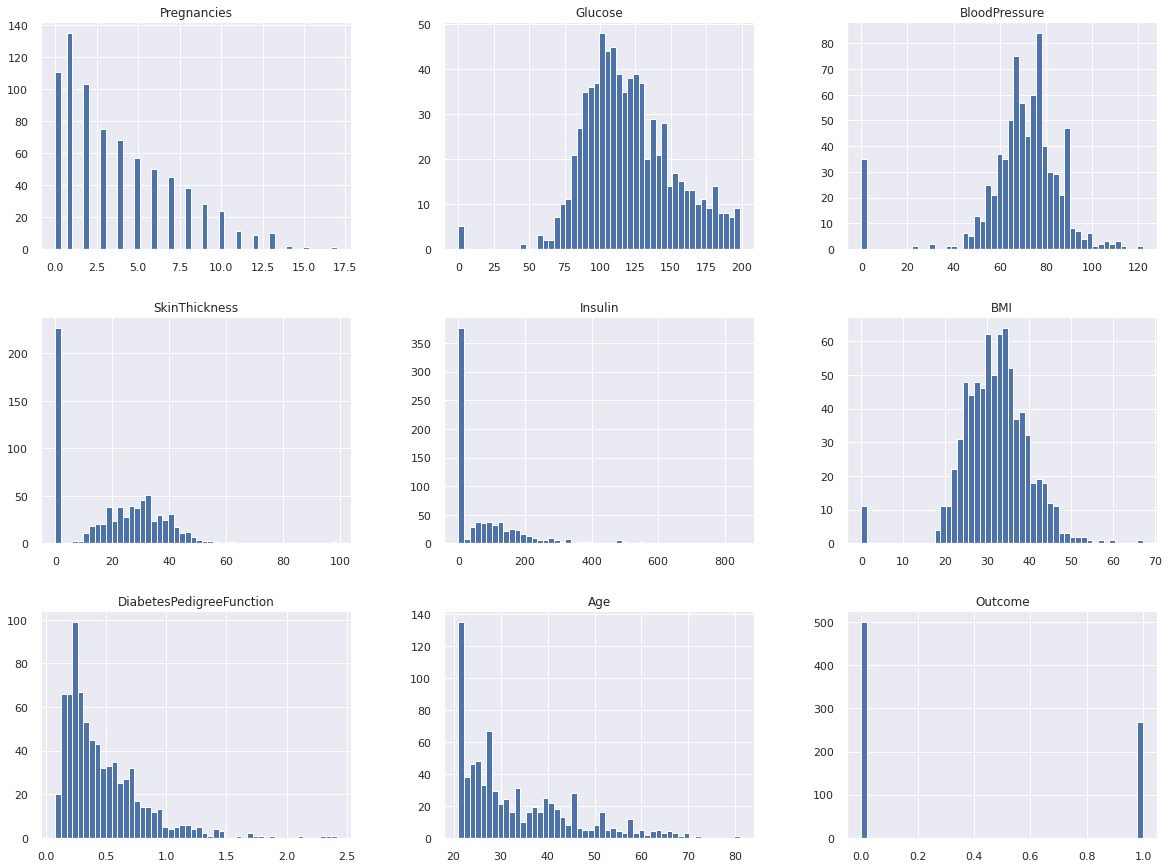

In [11]:
diabetes_data.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
#Find total number of zeros
# Count number of zeros in all columns of Dataframe
for column_name in diabetes_data.columns:
    column = diabetes_data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column', column_name, ' is : ', count)

Count of zeros in column Pregnancies  is :  111
Count of zeros in column Glucose  is :  5
Count of zeros in column BloodPressure  is :  35
Count of zeros in column SkinThickness  is :  227
Count of zeros in column Insulin  is :  374
Count of zeros in column BMI  is :  11
Count of zeros in column DiabetesPedigreeFunction  is :  0
Count of zeros in column Age  is :  0
Count of zeros in column Outcome  is :  500


In [13]:
corr_matrix = diabetes_data.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

#Stratified data split

In [14]:
#TEMPLATE - prepare X & y
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [15]:
#TEMPLATE - create a stratified split
from sklearn.model_selection import train_test_split
X_train_raw,X_test_raw,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)
#total rows: 768
#train set: 614
  #train set: 491
  #validation set: 123
#test set: 154

In [16]:
feature_names = list(diabetes_data.columns[:-1])
feature_target = list(diabetes_data.columns[-1:])

In [17]:
#TEMPLATE - verifying its a stratified split
def outcome_cat_proportions(data):
  return data.value_counts() / len(data)

compare_props = pd.DataFrame({
    "Overall": outcome_cat_proportions(diabetes_data["Outcome"]),
    "Train data": outcome_cat_proportions(y_train),
    "Test data": outcome_cat_proportions(y_test)
})
compare_props

,Overall,Train data,Test data
0,0.651042,0.651466,0.649351
1,0.348958,0.348534,0.350649


# Train Data cleaning

In [18]:
#TEMPLATE - cleaning remove zeros - replace with NaN
X_train = X_train_raw.copy(deep = True)
#TEMPLATE - copy new dataframe values
X_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [19]:
#replace na with mean() & Median()
X_train['Glucose'].fillna(X_train['Glucose'].mean(), inplace = True)
X_train['BloodPressure'].fillna(X_train['BloodPressure'].mean(), inplace = True)
X_train['SkinThickness'].fillna(X_train['SkinThickness'].median(), inplace = True)
X_train['Insulin'].fillna(X_train['Insulin'].median(), inplace = True)
X_train['BMI'].fillna(X_train['BMI'].median(), inplace = True)

In [20]:
#scale the inputs
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train =  pd.DataFrame(sc_X.fit_transform(X_train,),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

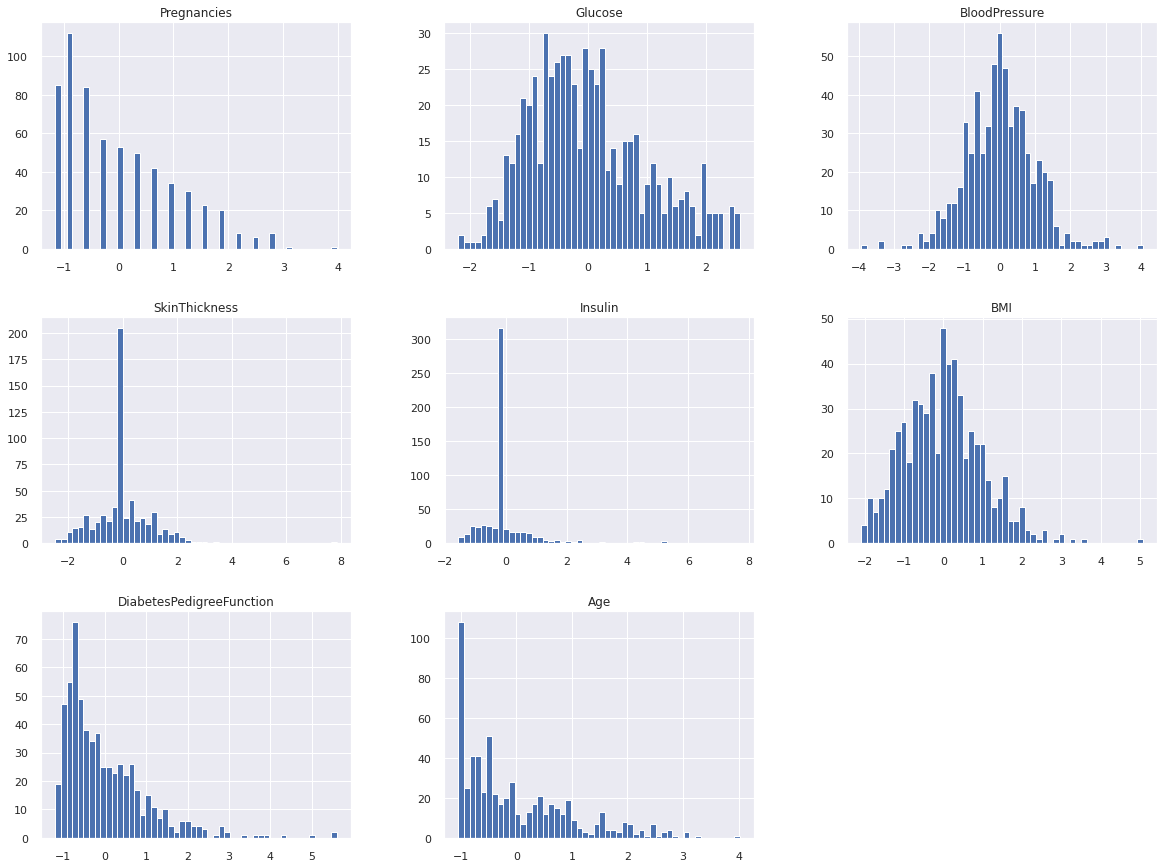

In [21]:
#show histogram without zeros
X_train.hist(bins=50, figsize=(20,15))
plt.show()

#Test Data Cleaning

In [22]:
#TEMPLATE - cleaning remove zeros - replace with NaN
X_test = X_test_raw.copy(deep = True)
#TEMPLATE - copy new dataframe values
X_test[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_test[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [23]:
#replace na with mean() & Median()
X_test['Glucose'].fillna(X_test['Glucose'].mean(), inplace = True)
X_test['BloodPressure'].fillna(X_test['BloodPressure'].mean(), inplace = True)
X_test['SkinThickness'].fillna(X_test['SkinThickness'].median(), inplace = True)
X_test['Insulin'].fillna(X_test['Insulin'].median(), inplace = True)
X_test['BMI'].fillna(X_test['BMI'].median(), inplace = True)

In [24]:
#scale the inputs
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_test =  pd.DataFrame(sc_X.fit_transform(X_test,),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Decision Tree - Unconstrained Run
Plain Decision tree execution

In [25]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# importance of features
print("tree_clf.feature_importances_", tree_clf.feature_importances_)
print("mean.feature_importances_", np.mean(tree_clf.feature_importances_))
sorted(zip(tree_clf.feature_importances_, feature_names), reverse=True)

tree_clf.feature_importances_ [0.07845098 0.34098649 0.08647592 0.01652028 0.07556354 0.19769936
 0.09008259 0.11422083]
mean.feature_importances_ 0.125


[(0.34098648654611813, 'Glucose'),
 (0.19769936193926904, 'BMI'),
 (0.11422083028282053, 'Age'),
 (0.09008258924801159, 'DiabetesPedigreeFunction'),
 (0.08647592299333574, 'BloodPressure'),
 (0.07845098170982606, 'Pregnancies'),
 (0.07556354494207163, 'Insulin'),
 (0.016520282338547243, 'SkinThickness')]

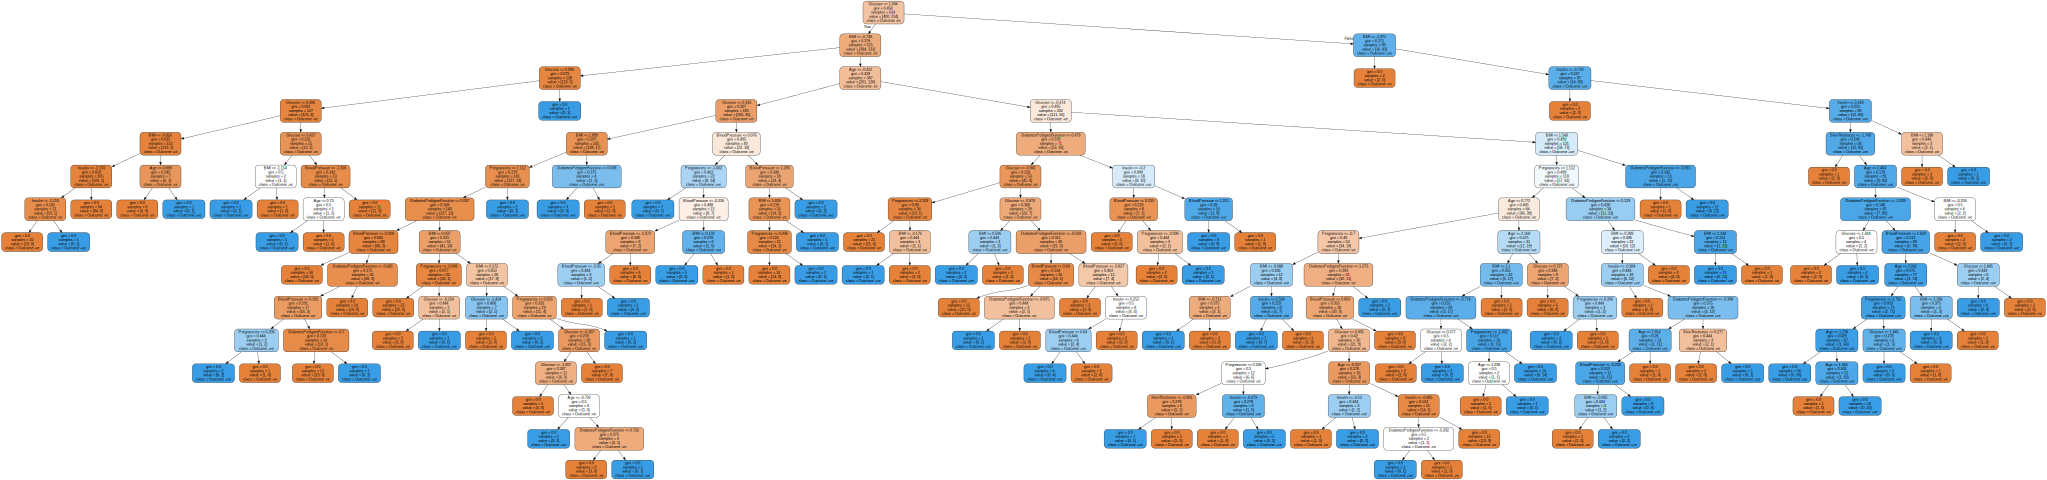

In [26]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join("./", "diabetes_tree.dot"),
        feature_names=feature_names,
        class_names=[feature_target[0]+' -ve',feature_target[0]+' +ve'],
        rounded=True,
        filled=True
        )

Source.from_file(os.path.join(".", "diabetes_tree.dot"))


In [27]:
#TEMPLATE - Converet png file
import pydot

(graph,) = pydot.graph_from_dot_file('diabetes_tree.dot')
graph.write_png('diabetes_tree.png')

# Random search
Random search to find hyper parameters which may possibly work for further fine tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'max_depth': randint(low=1, high=30),
        'max_leaf_nodes': randint(low=1, high=100),
        'min_samples_leaf': randint(low=1, high=100),
    }

tree_clf_unconst = DecisionTreeClassifier(random_state=42)
rnd_search = RandomizedSearchCV(tree_clf_unconst, param_distributions=param_distribs,
                                n_iter=100, cv=5, scoring='f1_weighted', random_state=42)
rnd_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 316, in fit
    max_leaf_nodes
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn(so

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2b8f5cf590>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2b8f5d4f10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2b8f56f7d0>},
                   random_state=42, scoring='f1_weighted')

In [ ]:
rnd_search_df = pd.DataFrame({'param': rnd_search.cv_results_["params"], 'f1_weighted': rnd_search.cv_results_["mean_test_score"]})
rnd_search_df.sort_values(by=['f1_weighted'], ascending=False)

In [ ]:
rnd_search.best_estimator_

DecisionTreeClassifier(max_depth=26, max_leaf_nodes=14, min_samples_leaf=27,
                       random_state=42)

# Grid search
Grid search to find best parameters


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try combinations of depth starting at 2
    {'max_depth': list(range(24, 28)), 'max_leaf_nodes': list(range(12,17)), 'min_samples_leaf': list(range(24,28))},
    {'max_features':list(range(1,8))}
  ]

tree_clf_unconst = DecisionTreeClassifier(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(tree_clf_unconst, param_grid, cv=5,
                           scoring='f1_weighted',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [24, 25, 26, 27],
                          'max_leaf_nodes': [12, 13, 14, 15, 16],
                          'min_samples_leaf': [24, 25, 26, 27]},
                         {'max_features': [1, 2, 3, 4, 5, 6, 7]}],
             return_train_score=True, scoring='f1_weighted')

In [ ]:
grid_search_df = pd.DataFrame({'param': grid_search.cv_results_["params"], 'f1_weighted': grid_search.cv_results_["mean_test_score"]})
grid_search_df.sort_values(by=['f1_weighted'], ascending=False)

,param,f1_weighted
43,"{'max_depth': 26, 'max_leaf_nodes': 12, 'min_samples_leaf': 27}",0.758867
39,"{'max_depth': 25, 'max_leaf_nodes': 16, 'min_samples_leaf': 27}",0.758867
51,"{'max_depth': 26, 'max_leaf_nodes': 14, 'min_samples_leaf': 27}",0.758867
67,"{'max_depth': 27, 'max_leaf_nodes': 13, 'min_samples_leaf': 27}",0.758867
23,"{'max_depth': 25, 'max_leaf_nodes': 12, 'min_samples_leaf': 27}",0.758867
31,"{'max_depth': 25, 'max_leaf_nodes': 14, 'min_samples_leaf': 27}",0.758867
19,"{'max_depth': 24, 'max_leaf_nodes': 16, 'min_samples_leaf': 27}",0.758867
35,"{'max_depth': 25, 'max_leaf_nodes': 15, 'min_samples_leaf': 27}",0.758867
59,"{'max_depth': 26, 'max_leaf_nodes': 16, 'min_samples_leaf': 27}",0.758867
71,"{'max_depth': 27, 'max_leaf_nodes': 14, 'min_samples_leaf': 27}",0.758867


#Run Best Estimator

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#Based on grid search define best estimator for generating learning curves, confusion matrix & for final predict()
best_estimator = DecisionTreeClassifier(random_state=42,max_depth= 24, max_leaf_nodes=14)
best_est_title = 'max_depth=24,max_leaf_nodes=14'
#min_samples_leaf=27

# Learning Curve
Based on grid search define best estimator for generating learning curves, confusion matrix & for final predict()

In [ ]:
from sklearn.model_selection import learning_curve

def learning_curves(estimator, data, features, y, cv,title):
   plt.figure(figsize = (16,5))
   tot_col = 2
  #call learning curve function
   train_sizes, train_scores, validation_scores,fit_times, _ = learning_curve(estimator, data[features], y, cv = cv, scoring = 'f1_weighted', shuffle=True,return_times=True)
   #find the mean values
   train_scores_mean = train_scores.mean(axis = 1)
   validation_scores_mean = validation_scores.mean(axis = 1)
   fit_times_mean = fit_times.mean(axis = 1)
   #Plot-1 - Learning Curve: training error and validation error   
   plt.subplot(1,tot_col,(1))
   plt.plot(train_sizes, train_scores_mean, "o-", label = 'Training score')
   plt.plot(train_sizes, validation_scores_mean, "o-", label = 'Validation score')
   plt.ylabel('f1 weighted', fontsize = 14)
   plt.xlabel('Training set size', fontsize = 14)
  #  title = 'Learning curves for ' +  title
   plt.title(title, fontsize = 18, y = 1.03)
   plt.legend()
   plt.ylim(0,1.10)

   #Plot-2 - Scalability of the model - Plot n_samples vs fit_times
   plt.subplot(1,tot_col,(2))
   plt.plot(train_sizes, fit_times_mean, "o-", label = 'Training fit-times')
   plt.ylabel('fit_times', fontsize = 14)
   plt.xlabel('Training set size', fontsize = 14)
   plt.title("Scalability of the model", fontsize = 18, y = 1.03)
   plt.legend()
  #  plt.ylim(*ylim)

  #  #Plot-3 - Performance of the model - Plot fit_time vs score
  #  fit_time_argsort = fit_times_mean.argsort()
  #  fit_time_sorted = fit_times_mean[fit_time_argsort]
  #  validation_scores_mean_sorted = validation_scores_mean[fit_time_argsort]
  # #  test_scores_std_sorted = test_scores_std[fit_time_argsort]
  #  plt.subplot(1,tot_col,(3))
  #  plt.plot(fit_time_sorted, validation_scores_mean_sorted)
  #  plt.ylabel('fit_times', fontsize = 14)
  #  plt.xlabel('Score', fontsize = 14)
  #  plt.title("Performance of the model", fontsize = 18, y = 1.03)
  #  plt.legend()
  #  plt.ylim(*ylim)

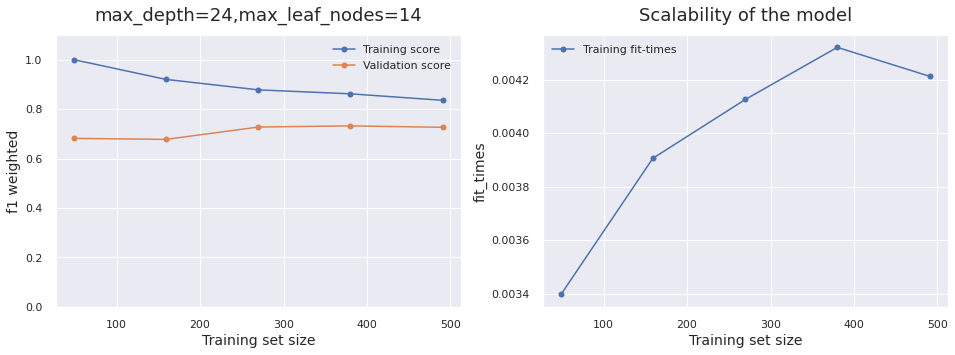

In [ ]:
#run learning_curves
learning_curves(best_estimator, X_train, feature_names, y_train, 5,best_est_title)
plt.savefig('learning_curves.pdf')  

# Confusion Matrix, Precisioin & Recall

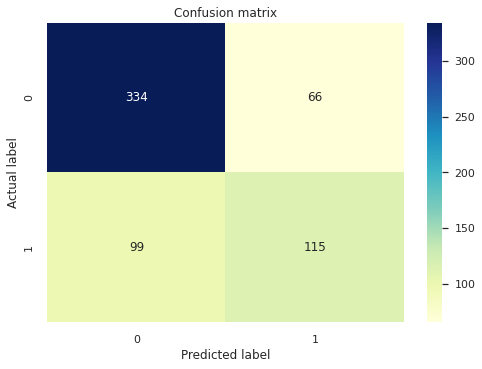

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

y_train_pred = cross_val_predict(best_estimator,X_train,y_train, cv=5)
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('confusion_matrix.pdf')  

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred,average='weighted')

0.7253679189896385

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train,y_train_pred)

0.6353591160220995

In [ ]:
recall_score(y_train,y_train_pred)

0.5373831775700935

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       400
           1       0.64      0.54      0.58       214

    accuracy                           0.73       614
   macro avg       0.70      0.69      0.69       614
weighted avg       0.72      0.73      0.73       614



# Validation Curve
generate validation curve to develop intuition for analysis

In [ ]:
from sklearn.model_selection import validation_curve

def validation_curves(estimator, data, features, y,param_name, param_range,invert_axis):
   #call valiidation curve function
   train_scores, validation_scores = validation_curve(estimator, data[features], y, param_name=param_name, param_range=param_range, cv = 5, scoring = 'f1_weighted')
   train_scores_mean = train_scores.mean(axis = 1)
   validation_scores_mean = validation_scores.mean(axis = 1)
   #Plot training error and validation error   
   plt.plot(param_range, train_scores_mean,label = 'Training score')
   plt.plot(param_range, validation_scores_mean, label = 'Validation score')
   # provide x & y labels
   plt.ylabel('f1_weighted', fontsize = 14)
   plt.xlabel(param_name, fontsize = 14)
   if invert_axis:
     ax = plt.gca()
     ax.invert_xaxis()
   title =  param_name
   plt.title(title, fontsize = 18, y = 1.03)
   plt.legend()
   plt.ylim(0,1.10)


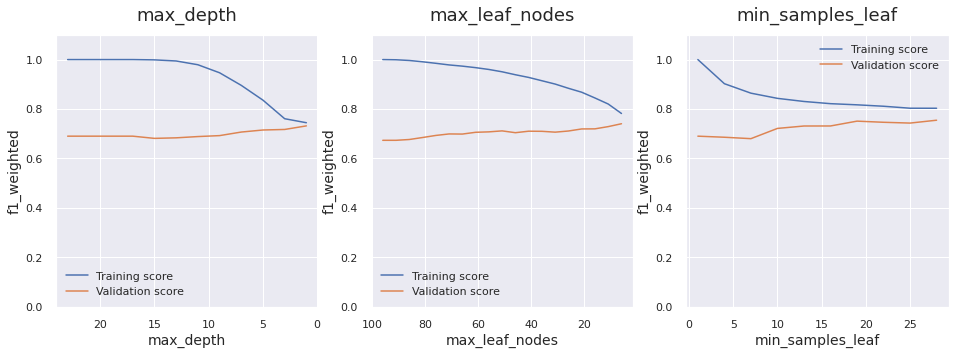

In [ ]:
#execute validation curves
plt.figure(figsize = (16,5))
tree_clf_unconst = DecisionTreeClassifier(random_state=42)

for model, param_name, param_range,i,invert_axis in [(tree_clf_unconst,"max_depth" , np.arange(1, 25, 2), 0,True), (tree_clf_unconst,"max_leaf_nodes", np.arange(1, 100, 5),1,True),(tree_clf_unconst,"min_samples_leaf", np.arange(1, 30, 3),2,False)]:
    plt.subplot(1,3,(i+1))
    validation_curves(model, X_train, feature_names, y_train, param_name, param_range,invert_axis=invert_axis)
plt.savefig('validation_curves.pdf')  

#Test set prediction

In [ ]:
#fit the best model
best_estimator.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=24, max_leaf_nodes=14, random_state=42)

In [ ]:
#use the model to predict
y_test_pred = best_estimator.predict(X_test)

In [ ]:
#calculate weighted f1 score weighted
from sklearn.metrics import f1_score
f1_score(y_test,y_test_pred,average='weighted')

0.7889074276508831

In [ ]:
precision_score(y_test,y_test_pred)

0.6666666666666666

In [ ]:
recall_score(y_test,y_test_pred)

0.7777777777777778

#References


*   Learning curves for ML: https://www.dataquest.io/blog/learning-curves-machine-learning/
*   Scoring values for learning_curve: https://stackoverflow.com/questions/46863421/what-is-the-score-in-plot-learning-curve-of-scikit-learn
* Measures of central tendancy: Mean, Median & Mode : https://statisticsbyjim.com/basics/measures-central-tendency-mean-median-mode/
* validation curves: https://www.geeksforgeeks.org/validation-curve/
* Applied machine learning: https://amueller.github.io/aml/00-introduction/00-introduction.html
